# Enexis Energy - Data Science case study - Bird's eye view of the data

In [1]:
!pip install pandas matplotlib

### Importing packages

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

### Functions

In [3]:
def f_concat(l_input):

    # Initialize.
    dummy = ""
    n_len = len(l_input)
    
    if n_len == 1:
        return l_input[0]

    # Loop through text elements.
    for i in range(n_len-1):
        dummy = dummy + l_input[i] + ", "

    # Append last element.
    dummy = dummy + "and " + l_input[n_len-1]

    # Return result.
    return dummy

In [4]:
def f_info(df_input, c_feature, n_top =  10):

    # Testing!
    #df_input  = df_historyPerYear
    #c_feature = "year"
    #n_top     = 3

    # Do not calculate the frequency table in case the feature has unique values.
    if(df_input[c_feature].is_unique):
        print("Feature '" + c_feature + "' is unique.")
        return


    # Load package.
    from collections import Counter

    # Bereken frequenties.
    c = Counter(df_input[c_feature])

    # Converteer naar data frame.
    df_output         = pd.DataFrame(list(c.items()))

    # Hernoem kolomnamen.
    df_output.columns = ["level", "n"]

    # Bereken percentage.
    df_output["perc"] = round(100 * df_output["n"] / df_input.shape[0], 1).astype(str) + "%"

    # Sorteer data frame op frequentie.
    df_output         = df_output.sort_values(by = "n", ascending = False)

    # Reset index en verwijder index kolom die daardoor ontstaat.
    df_output         = df_output.reset_index().drop(columns=['index'])

    # Display tabel zonder index.
    # https://stackoverflow.com/questions/61363712/how-to-print-a-pandas-io-formats-style-styler-object
    if(df_output.shape[0] <= n_top):
        c.message = "we tonen alle " + str(df_output.shape[0]) + " levels:"
        
    else:
        c.message = "we tonen de Top-" + str(n_top) + " van de " + str(df_output.shape[0]) + " levels:"

        
    # Print header
    print("Frequentietabel voor '" + c_feature + "', " + c.message + "\n")
        
    print(f"'None': {c[None]} ({round(100 * c[None] / df_input.shape[0], 1)}%)")

    print(f"'NA':   {df_input[c_feature].isna().sum()} ({round(100 * df_input[c_feature].isna().sum() / df_input.shape[0], 1)}%)")
            
    display(df_output.head(n_top).style.hide_index())
    
    #plt.hist(df["year"], bins=10, orientation='horizontal') #plt.show()

    # Plot frequency if count is smaller than 20.
    v_data_to_plot = df[c_feature].value_counts(sort = True)[0:n_top]
    
    # https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
    plt.rcParams['figure.figsize'] = [15, 5]
    
    fig, ax = plt.subplots()
    v_data_to_plot.plot(kind='bar', ax=ax)  
    plt.show()
    

In [5]:
#df['transactions'].value_counts(sort = True)[0:10]

In [6]:
#f_info(df, "month", 15)

In [7]:
def f_describe(df_input, n_top = 10):
    
    print("First " + str(n_top) + " rows in de data:")
    display(df_input.head(n_top))
     
    
    df_numeric = df_input.select_dtypes(include = ['uint8', 'uint16', 'uint32', 'uint64', 'int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

    if len(df_numeric.columns):
        print("Numerical data:")
        display(df_numeric.describe())

        
    df_textual = df_input.select_dtypes(include = ['category', 'object', 'bool'])

    if len(df_textual.columns):
        print("Textual data:")
        display(df_textual.describe())
        
        
    v_na = [col + " (" + str(df[col].isna().sum()) + ", " + str(round(100 * df[col].isna().sum() / df.shape[0], 1)) + "%)" for col in df.columns if df[col].isna().sum() > 0]

    if len(v_na) > 0:
        print("Features and their number of missing values:")
        display(f_concat(v_na))


In [8]:
def f_get_data(i=0):

    # Define path.
    c_path = "../data/"

    # Identify file.
    v_file = ("Enexis_kleinverbruiksgegevens_01012010",                                          # 0
              "Enexis_kleinverbruiksgegevens_01012020",                                          # 1
              "Enexis_decentrale_opwek_kv_(zon_pv)_01012020",                                    # 2
              "Open_Asset_Data_Elektra_CSV/IMKL-Appurtenance_E_Lv_Charging_Point_Noord_ligging", # 3
              "CBS_PC6_2016_v2")                                                                 # 4
    
    
    # Assign decimal separator.
    if(i in [0, 1]):
        c_decimal = ","
        
    else:
        c_decimal = "."
        
        
    # Load data. Used encoding= 'unicode_escape' to read 'kvb 01012010'.
    df     = pd.read_csv(filepath_or_buffer = c_path + v_file[i] + ".csv",
                         sep                = ';',
                         decimal            = c_decimal,
                         encoding           = 'unicode_escape')
    
    print(c_path + v_file[i] + ".csv")
    print(c_decimal)
    
    # Return data.
    return df

### Importing data
Import the data by selecting the index of the file in v_file in f_get_data.

In [9]:
df = f_get_data(2)

../data/Enexis_decentrale_opwek_kv_(zon_pv)_01012020.csv
.


### Downcast data as needed

In [10]:
# A few basic statistics on the data frame.
print("The data:\n")
print(f"-> has size of {sys.getsizeof(df)/1024.0/1024.0:0.2f} MB.")
print("")

df.info()

The data:

-> has size of 1.26 MB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ï»¿Peildatum                               3890 non-null   float64
 1   Netbeheerder                               3890 non-null   object 
 2   Provincie                                  3889 non-null   object 
 3   Gemeente                                   3888 non-null   object 
 4   CBS Buurt                                  3757 non-null   object 
 5   CBS Buurtcode                              3729 non-null   float64
 6   Aantal aansluitingen in CBS-buurt          3890 non-null   float64
 7   Aantal aansluitingen met opwekinstallatie  3890 non-null   float64
 8   Opgesteld vermogen                         3890 non-null   float64
dtypes: float64(5), object(4)
memory usage: 326.9+ KB


In [11]:
# objects to categorical - Not applicable here because there are no 'object' features
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype('category')

# convert integers to smallest unsigned integer and floats to smallest
for old, new in [('integer', 'unsigned'), ('float', 'float')]:
    
    print("\nchange: " + old + " --> " + new)
    
    for col in df.select_dtypes(include=old).columns:
        
        print(col)
        
        df[col] = pd.to_numeric(df[col], downcast=new)


change: integer --> unsigned

change: float --> float
ï»¿Peildatum
CBS Buurtcode
Aantal aansluitingen in CBS-buurt 
Aantal aansluitingen met opwekinstallatie
Opgesteld vermogen


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ï»¿Peildatum                               3890 non-null   float32 
 1   Netbeheerder                               3890 non-null   category
 2   Provincie                                  3889 non-null   category
 3   Gemeente                                   3888 non-null   category
 4   CBS Buurt                                  3757 non-null   category
 5   CBS Buurtcode                              3729 non-null   float64 
 6   Aantal aansluitingen in CBS-buurt          3890 non-null   float32 
 7   Aantal aansluitingen met opwekinstallatie  3890 non-null   float32 
 8   Opgesteld vermogen                         3890 non-null   float32 
dtypes: category(4), float32(4), float64(1)
memory usage: 299.2 KB


### Some Statistics:

In [14]:
print("The data:\n")
print(f"-> contain {df.shape[0]/1e6:0.1f} million observations and {df.shape[1]} features.\n")
print(f"-> contain {df.shape[0]} observations and {df.shape[1]} features.\n")
print(f"-> have feature names: {f_concat(df.columns)}.\n")
print(f"-> has size of {sys.getsizeof(df)/1024.0/1024.0:0.2f} MB.")

The data:

-> contain 0.0 million observations and 9 features.

-> contain 4647 observations and 9 features.

-> have feature names: ï»¿Peildatum, Netbeheerder, Provincie, Gemeente, CBS Buurt , CBS Buurtcode, Aantal aansluitingen in CBS-buurt , Aantal aansluitingen met opwekinstallatie, and Opgesteld vermogen.

-> has size of 0.52 MB.


In [15]:
f_describe(df)

First 10 rows in de data:


,ï»¿Peildatum,Netbeheerder,Provincie,Gemeente,CBS Buurt,CBS Buurtcode,Aantal aansluitingen in CBS-buurt,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen
0,202001.0,Enexis,Groningen,Appingedam,Appingedam-Centrum,30000.0,1.480,155.0,507.000
1,202001.0,Enexis,Groningen,Appingedam,Appingedam-West,30001.0,1.331,479.0,1.685
2,202001.0,Enexis,Groningen,Appingedam,Appingedam-Oost,30002.0,2.826,439.0,1.616
3,202001.0,Enexis,Groningen,Appingedam,Verspreide huizen Damsterdiep en Eemskanaal,30007.0,230.000,97.0,405.000
4,202001.0,Enexis,Groningen,Appingedam,Verspreide huizen ten zuiden van Eemskanaal,30008.0,102.000,21.0,61.000
5,202001.0,Enexis,Groningen,Appingedam,Verspreide huizen ten noorden van het Damsterdiep,30009.0,137.000,31.0,166.000
6,202001.0,Enexis,Groningen,Groningen,Ten Boer,90000.0,1.732,534.0,1.656
7,202001.0,Enexis,Groningen,Groningen,Sint-Annen,90003.0,58.000,24.0,93.000
8,202001.0,Enexis,Groningen,Groningen,Verspreide huizen ten noorden van het Eemskanaal,90009.0,488.000,196.0,1.109
9,202001.0,Enexis,Groningen,Groningen,Ten Post,90100.0,266.000,107.0,585.000


Numerical data:


,ï»¿Peildatum,CBS Buurtcode,Aantal aansluitingen in CBS-buurt,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen
count,3890.0,3.729000e+03,3890.000000,3890.000000,3890.000000
mean,202001.0,9.669277e+06,267.369598,101.218048,293.752869
std,0.0,6.547942e+06,268.376007,115.934532,232.853012
min,202001.0,3.000000e+04,1.002000,1.007000,1.006000
25%,202001.0,1.890107e+06,45.250000,27.000000,116.000000
50%,202001.0,8.551707e+06,183.000000,59.000000,236.500000
75%,202001.0,1.690060e+07,419.000000,130.000000,432.000000
max,202001.0,1.987031e+07,999.000000,958.000000,998.000000


Textual data:


,Netbeheerder,Provincie,Gemeente,CBS Buurt
count,3890,3889,3888,3757
unique,1,5,142,3632
top,Enexis,Noord-Brabant,Groningen,Centrum
freq,3890,1394,98,17


Features and their number of missing values:


'ï»¿Peildatum (757, 16.3%), Netbeheerder (757, 16.3%), Provincie (758, 16.3%), Gemeente (759, 16.3%), CBS Buurt  (890, 19.2%), CBS Buurtcode (918, 19.8%), Aantal aansluitingen in CBS-buurt  (757, 16.3%), Aantal aansluitingen met opwekinstallatie (757, 16.3%), and Opgesteld vermogen (757, 16.3%)'

Frequentietabel voor 'Netbeheerder', we tonen alle 2 levels:

'None': 0 (0.0%)
'NA':   757 (16.3%)


/tmp/ipykernel_3206/3620508901.py:51: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df_output.head(n_top).style.hide_index())


level,n,perc
Enexis,3890,83.7%
nan,757,16.3%


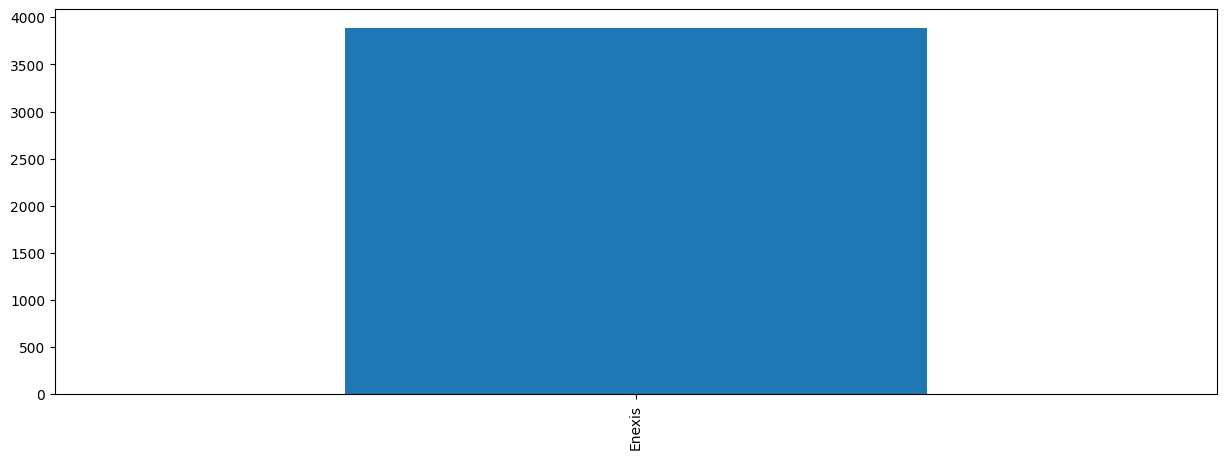

In [17]:
f_info(df, "Netbeheerder")